# Price Recommendation for online sellers using regressoin

## importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## DATA

In [ ]:
data = pd.read_csv("data.csv", encoding='unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data Preprocessing

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,301295.000000,301295.000000,216796.000000
mean,9.564842,4.951907,15279.453804
std,200.141068,115.968847,1730.020555
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13850.000000
50%,3.000000,2.100000,15140.000000
75%,10.000000,4.130000,16818.000000
max,74215.000000,38970.000000,18287.000000


In [ ]:
shape = data.shape
print(shape)

(301296, 8)


In [ ]:
data.isnull().sum()

InvoiceNo          0
StockCode          0
Description     1110
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     84500
Country            1
dtype: int64

In [ ]:
data.drop(["CustomerID"], axis = 1, inplace = True)
data.dropna(axis = 0, inplace = True)

In [ ]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [ ]:
shape = data.shape
print(shape)

(300185, 7)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300185 entries, 0 to 301294
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    300185 non-null  object 
 1   StockCode    300185 non-null  object 
 2   Description  300185 non-null  object 
 3   Quantity     300185 non-null  float64
 4   InvoiceDate  300185 non-null  object 
 5   UnitPrice    300185 non-null  float64
 6   Country      300185 non-null  object 
dtypes: float64(2), object(5)
memory usage: 18.3+ MB


## Data Formmating

In [ ]:
month = []
year = []

for i in data["InvoiceDate"]:
  temp = i.split('/')
  month.append(int(temp[1]))
  year.append(int(temp[2][:4]))

data["Month"] = month
data["year"]  = year

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,United Kingdom,1,2010
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,United Kingdom,1,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,United Kingdom,1,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,United Kingdom,1,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,United Kingdom,1,2010


In [ ]:
data['Total Price'] = data['UnitPrice'] * data['Quantity']

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Month,year,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,United Kingdom,1,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,United Kingdom,1,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,United Kingdom,1,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,United Kingdom,1,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,United Kingdom,1,2010,20.34


<ipython-input-49-0ab88864d8d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt=".2f")


<Axes: >

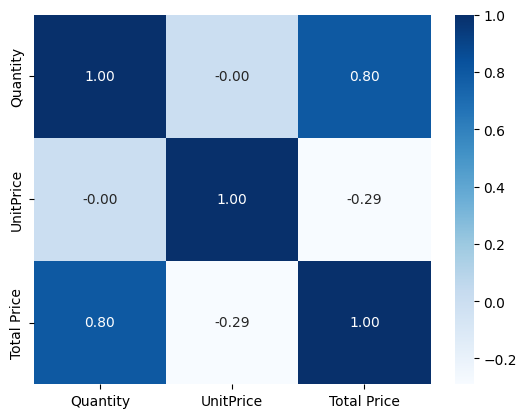

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt=".2f")

Total prize is highly corelated with the quality

In [ ]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
Country         object
Month            int64
year             int64
Total Price    float64
dtype: object

In [ ]:
data.drop(["InvoiceDate"], axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["InvoiceNo"] = le.fit_transform(data["InvoiceNo"])
data["StockCode"] = le.fit_transform(data["StockCode"])

## Separated the data

In [ ]:
X = data.drop(['InvoiceNo','StockCode','Total Price','Description','Country'], axis = 1)
y = data["Total Price"]

In [ ]:
X.dtypes

Quantity     float64
UnitPrice    float64
Month          int64
year           int64
dtype: object

In [ ]:
X.head()

,Quantity,UnitPrice,Month,year
0,6.0,2.55,1,2010
1,6.0,3.39,1,2010
2,8.0,2.75,1,2010
3,6.0,3.39,1,2010
4,6.0,3.39,1,2010


In [ ]:
y.head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Total Price, dtype: float64

## Spliting the training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Importing the models for train

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg

model = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    xg.XGBRegressor(n_estimators = 10, seed = 123)
]

## Training the model and evaluating the performance of the model using r^2 score

In [ ]:
from sklearn.metrics import r2_score

models = []
r2 = []
for m in model:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    r2_value = r2_score(y_test,y_pred)
    models.append(m.__class__.__name__)
    r2.append(r2_value)
    print(f"{m.__class__.__name__} R2 Score: {r2_value}")

LinearRegression R2 Score: 0.8449580399959911
RandomForestRegressor R2 Score: 0.21635215261172502
XGBRegressor R2 Score: 0.21933878268096052


## Linear Regression performed well the value of the r2 score is almost close to the 1